Решить однородное уравнение теплопроводности с граничными условиями Дирихле 
\begin{equation} \label{c9eq1}
	\begin{cases}
		\displaystyle \frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2} \\
		\displaystyle u(x,0) = e^{-(x-5)^4} + 0.01x \\
		u(0,t) = u(0,0) \\  
		u(a,t) = u(a,0)
	\end{cases}
\end{equation}
на отрезке $x \in [0; a]$ при $t \in [0; T]$ Выбрать $a = 20$ и $T = 20$, а коэффициент теплопроводности $k = 2$. Шаг по пространству $h = 0.01$, шаг по времени $\tau = 0.05$. Расчет проводить с помощью комплексной схемы Розенброка. После каждого временного слоя выводить решение на текущем слое для получения анимационной картинки. Чтобы избежать постоянного изменения масштаба графика рекомендуется после команды $\texttt{plot}$ вставить команду $\texttt{axis([0 a 0 1])}$, не забыв далее поставить команду $\texttt{pause(1e-6)}$.
Тот же расчет необходимо повторить с граничными условиями Неймана
\begin{equation} \label{c9eq2}
	u_x(0,t) = u_x(a,t) = 0.
\end{equation}

Счет будет идти быстрее, если использовать аппарат разреженных матриц MATLAB (смотри документацию к функции $\texttt{spdiags}$).

Граничные условия надо включить в оператор пространственного дифференцирования $\Lambda_x$, видоизменив в нем первую и последнюю строки. Поскольку в данной задаче коэффициент теплопроводности постоянен, то оператор $\Lambda_x$ можно вычислить один раз до начала расчета.

Для аппроксимации граничных условий Неймана со 2 порядком следует использовать метод фиктивных точек.


In [56]:
%%time
import numpy as np
import scipy.sparse.linalg
from numpy import exp
from scipy import sparse

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

def mult(a, b):
    res = np.matrix(np.zeros(a.shape))
    for i in range(a.shape[0]):
        res[i] = a[i]*b[i]
    return res

def ux0(x):
    return [0.01*t + exp(-(t-5)**4) for t in x]

#global a, T, k, h, tau, x, t, sigma

a = 20
sigma = (1+1j)/2
T = 20
k = 2
h = 0.01
tau = 0.05

x = np.arange(0, a+h, h)
t = np.arange(0, T+tau, tau)
u = np.zeros((len(t), len(x)))

for i,ui in enumerate(ux0(x)):
    u[0][i] = ui 
    
for i in range(len(t)):
    u[i][0] = u[0][0]

for i in range(len(t)):
    u[i][-1] = u[0][-1]
    
diff_op = np.zeros((len(x),len(x)),dtype= np.float64)
for n in range(1, len(x)-1):
    diff_op[n][n-1] = 1
    diff_op[n][n] = -2
    diff_op[n][n+1] = 1
diff_op = k/h**2 * diff_op
A = np.eye(len(x),dtype= np.float64) - sigma*tau*diff_op;
A = sparse.csc_matrix(A)

for k in range(len(t)-1):
    B = np.matrix(diff_op,dtype= np.float64)*np.matrix(u[k],dtype= np.float64).T
    w = scipy.sparse.linalg.spsolve(A, B)
    u[k+1] = np.matrix(u[k]) + tau*np.real(w)

Wall time: 7.75 s


<IPython.core.display.Javascript object>


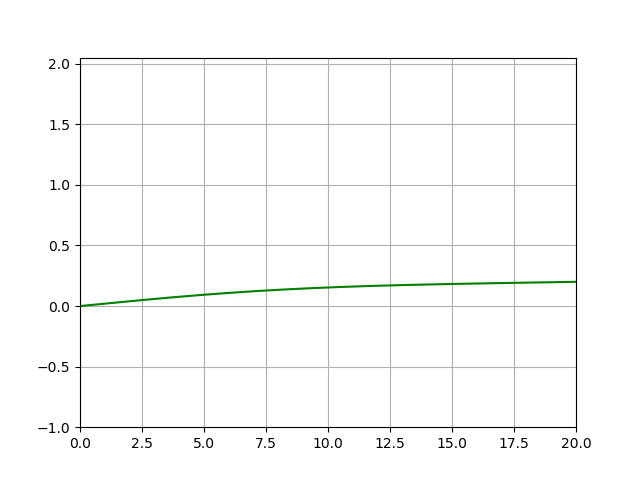

In [57]:
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook
fig, ax = plt.subplots()
ax.set_xlim(0,a)
maxv=-1e10
minv=1e10
minv = [min(minv,min(t)) for t in u]
minv=min(minv)
maxv = [max(maxv,max(t)) for t in u]
maxv=max(maxv)
ax.set_xlim(0,a)
ax.set_ylim(minv-1,maxv+1)
ax.grid(True)
line, = plt.plot(x, u[0], color='g')
def animate(n):
    #line, = plt.plot(x, u[n], color='g')
    line.set_data(x, u[n])
    return line,
anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=100)
plt.show()

In [60]:
%%time

def ux0(x):
    return [0.01*t + exp(-(t-5)**4) for t in x]

a = 20
sigma = (1+1j)/2
T = 20
k = 2
h = 0.01
tau = 0.05

x = np.arange(0, a+h, h)
t = np.arange(0, T+tau, tau)
u = np.zeros((len(t), len(x)))

for i,ui in enumerate(ux0(x)):
    u[0][i] = ui 
    
diff_op = np.zeros((len(x),len(x)),dtype= np.float64)
diff_op[0][0] = -2
diff_op[0][1] = 2
diff_op[-1][-2] = 2
diff_op[-1][-1] = -2
for n in range(1, len(x)-1):
    diff_op[n][n-1] = 1
    diff_op[n][n] = -2
    diff_op[n][n+1] = 1
diff_op = k/h**2 * diff_op
A = np.eye(len(x),dtype= np.float64) - sigma*tau*diff_op;
A = sparse.csc_matrix(A)

for k in range(len(t)-1):
    B = np.matrix(diff_op,dtype= np.float64)*np.matrix(u[k],dtype= np.float64).T
    w = scipy.sparse.linalg.spsolve(A, B)
    u[k+1] = np.matrix(u[k]) + tau*np.real(w)

Wall time: 7.66 s


<IPython.core.display.Javascript object>


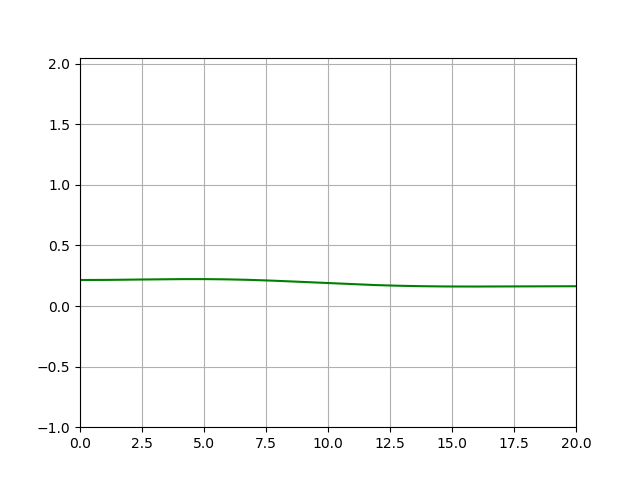

In [62]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.set_xlim(0,a)
maxv=-1e10
minv=1e10
minv = [min(minv,min(t)) for t in u]
minv=min(minv)
maxv = [max(maxv,max(t)) for t in u]
maxv=max(maxv)
ax.set_xlim(0,a)
ax.set_ylim(minv-1,maxv+1)
ax.grid(True)
line, = plt.plot(x, u[0], color='g')
def animate(n):
    #line, = plt.plot(x, u[n], color='g')
    line.set_data(x, u[n])
    return line,
anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=100)
plt.show()